In [10]:
import geopandas as gpd
import pandas as pd

zones = gpd.read_file("../data/processed/zones.geojson")

print(zones.head())  # first 5 rows
print(f"Number of zones: {len(zones)}")
print(f"Total bounds: {zones.total_bounds}")

     ZoneID  centroid_lat  centroid_lon Region8  \
0  BLR-0001     12.880317     77.476772      SW   
1  BLR-0002     12.898733     77.469049      SW   
2  BLR-0003     12.910828     77.472120      SW   
3  BLR-0004     12.923789     77.475233      SW   
4  BLR-0005     12.948733     77.475552       W   

                                            geometry  
0  POLYGON ((77.47802 12.87801, 77.47775 12.87814...  
1  POLYGON ((77.47802 12.90369, 77.47802 12.89288...  
2  POLYGON ((77.47802 12.9212, 77.47802 12.90369,...  
3  POLYGON ((77.47802 12.9212, 77.47176 12.9212, ...  
4  POLYGON ((77.47802 12.95622, 77.47802 12.93871...  
Number of zones: 223
Total bounds: [77.4600507 12.8336251 77.7834442 13.1426598]


In [15]:
import json, pydeck as pdk
z = zones.copy()
view = pdk.ViewState(latitude=z.geometry.centroid.y.mean(),
                     longitude=z.geometry.centroid.x.mean(), zoom=10)
layer = pdk.Layer(
    "GeoJsonLayer",
    data=json.loads(z.to_json()),
    stroked=True,
    filled=False,
    get_line_color=[0,0,0,180],
    line_width_min_pixels=1,
    pickable=True,
)
pdk.Deck(layers=[layer], initial_view_state=view)

/var/folders/dy/m8k3w5n10rg7xhthbf5pxwyr0000gn/T/ipykernel_57879/90342127.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  view = pdk.ViewState(latitude=z.geometry.centroid.y.mean(),
/var/folders/dy/m8k3w5n10rg7xhthbf5pxwyr0000gn/T/ipykernel_57879/90342127.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude=z.geometry.centroid.x.mean(), zoom=10)


{
  "initialViewState": {
    "latitude": 12.978538992643134,
    "longitude": 77.60296426347672,
    "zoom": 10
  },
  "layers": [
    {
      "@@type": "GeoJsonLayer",
      "data": {
        "features": [
          {
            "geometry": {
              "coordinates": [
                [
                  [
                    77.47801700568237,
                    12.87800936089597
                  ],
                  [
                    77.4777545,
                    12.8781438
                  ],
                  [
                    77.4769995,
                    12.8781622
                  ],
                  [
                    77.4766971,
                    12.8783085
                  ],
                  [
                    77.4758274,
                    12.8784297
                  ],
                  [
                    77.4756497,
                    12.8788257
                  ],
                  [
                    77.4754542,
                    12.8791023
                  ],
                  [
                    77.4751132,
                    12.8795598
                  ],
                  [
                    77.475044,
                    12.8796576
                  ],
                  [
                    77.47495820000002,
                    12.879779
                  ],
                  [
                    77.4748241,
                    12.8800484
                  ],
                  [
                    77.4748653,
                    12.8804166
                  ],
                  [
                    77.4749431,
                    12.8806772
                  ],
                  [
                    77.47515759999999,
                    12.88095
                  ],
                  [
                    77.4756498,
                    12.8813106
                  ],
                  [
                    77.4760682,
                    12.8816123
                  ],
                  [
                    77.4761828,
                    12.8816823
                  ],
                  [
                    77.47652669999998,
                    12.882001
                  ],
                  [
                    77.4769344,
                    12.8823687
                  ],
                  [
                    77.4773548,
                    12.8827476
                  ],
                  [
                    77.4775467,
                    12.8830055
                  ],
                  [
                    77.47794480000002,
                    12.8833948
                  ],
                  [
                    77.47801700568237,
                    12.883483324807106
                  ],
                  [
                    77.47801700568237,
                    12.87800936089597
                  ]
                ]
              ],
              "type": "Polygon"
            },
            "id": "0",
            "properties": {
              "Region8": "SW",
              "ZoneID": "BLR-0001",
              "centroid_lat": 12.880317330222073,
              "centroid_lon": 77.4767719724457
            },
            "type": "Feature"
          },
          {
            "geometry": {
              "coordinates": [
                [
                  [
                    77.47801700568237,
                    12.90368529217267
                  ],
                  [
                    77.47801700568237,
                    12.892876504695657
                  ],
                  [
                    77.47801279999999,
                    12.8928788
                  ],
                  [
                    77.47783239999998,
                    12.8930239
                  ],
                  [
                    77.4777172,
                    12.8932063
                  ],
                  [
                    77.4775888,
                    12.8933721
                  ],
                  [
               

In [16]:
import geopandas as gpd

zones = gpd.read_file("../data/processed/zones.geojson")
# project to meters
zones_m = zones.to_crs(3857)
zones_m["area_km2"] = zones_m.geometry.area / 1e6

print(f"Average zone size: {zones_m['area_km2'].mean():.3f} km²")
print(f"Min zone size: {zones_m['area_km2'].min():.3f} km²")
print(f"Max zone size: {zones_m['area_km2'].max():.3f} km²")
zones_m.head()


Average zone size: 3.401 km²
Min zone size: 0.090 km²
Max zone size: 4.000 km²


,ZoneID,centroid_lat,centroid_lon,Region8,geometry,area_km2
0,BLR-0001,12.880317,77.476772,SW,"POLYGON ((8624813.401 1445798.542, 8624784.179...",0.137871
1,BLR-0002,12.898733,77.469049,SW,"POLYGON ((8624813.401 1448730.672, 8624813.401...",2.005565
2,BLR-0003,12.910828,77.472120,SW,"POLYGON ((8624813.401 1450730.672, 8624813.401...",2.342631
3,BLR-0004,12.923789,77.475233,SW,"POLYGON ((8624813.401 1450730.672, 8624117.09 ...",0.378725
4,BLR-0005,12.948733,77.475552,W,"POLYGON ((8624813.401 1454730.672, 8624813.401...",0.956173


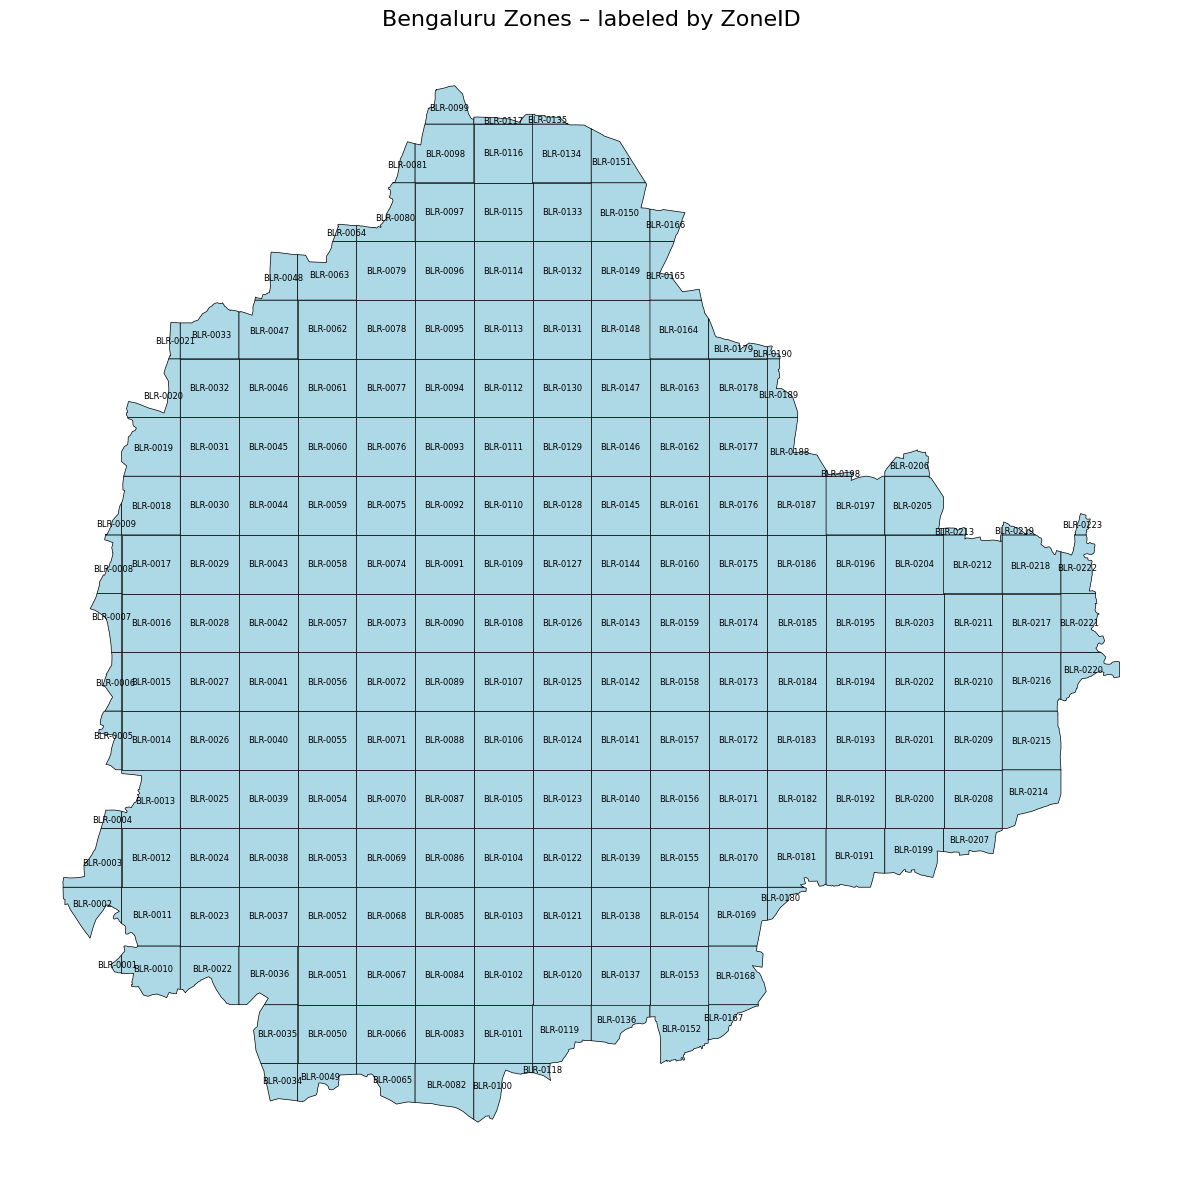

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# load your zones
zones = gpd.read_file("../data/processed/zones.geojson")   # or the correct path

# --- compute label positions correctly (project -> centroid -> back) ---
zones_proj = zones.to_crs(3857)                 # meters
cent_proj = zones_proj.geometry.centroid
cent_wgs  = gpd.GeoSeries(cent_proj, crs=3857).to_crs(4326)

zones_plot = zones.to_crs(4326).copy()
zones_plot["label_x"] = cent_wgs.x
zones_plot["label_y"] = cent_wgs.y

# --- plot + labels ---
fig, ax = plt.subplots(figsize=(15, 15))
zones_plot.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.5)

for _, r in zones_plot.iterrows():
    ax.text(r["label_x"], r["label_y"], r["ZoneID"],
            fontsize=6, ha="center", va="center")

ax.set_title("Bengaluru Zones – labeled by ZoneID", fontsize=16)
ax.axis("off")
plt.show()

